In [17]:
from IPython.display import Image
from IPython.core.display import HTML 

We also need to do some imports for our ML tasks. We are importing pandas as well as seaborn for the graphs and sklearn.
Froms sklearn we're importing two models that we'll use - Linear and Logistic Regression as well as some metrics that we will use to evaluate our models.

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In this Notebook we're dealing with two supervised Machine Learning models, one for classification and one for regression.


Classification algorithm:
- logistic regression


Regression algorithm:
- linear regression

### Data for Machine learning tasks

- data can as wee know be structured or unstructured
- for basic ML it's best if data is structured
- tabular based dataset contains data organized in rows and columns
- every column contains a feature, which is also known as a variable, a dimension or an attribute
- each column is known as a vector



### Variables

- in machine learning, the terms "dependent variable" and "independent variable" are used to describe the relationship between features (inputs) and targets (outputs) in a dataset. These variables play crucial roles in training and building machine learning models.

- Dependent Variable: Also known as the "target variable" or "output variable" 
     * the dependent variable is the variable that we want to predict or understand based on the input features. In supervised learning, the model learns to make predictions or infer patterns in the dependent variable based on the independent variables
     * The dependent variable is typically denoted as "y" and represents the outcome or the variable of interest in the problem.
     * Example: If we are building a model to predict housing prices, the dependent variable would be the actual prices of             the houses.

- Independent Variables: Also known as "predictor variables" or "input features" 
     * independent variables are the variables that are used to predict or explain the dependent variablee
     * the features or attributes that provide information to the model for making predictions. Independent variables are denoted as "X" and represent the input data or the set of features used in the model
     * Example: In the housing price prediction example, the independent variables could be features such as the size of the house, number of bedrooms, location, etc.

The relationship between the dependent and independent variables forms the basis of machine learning models. The goal is to find patterns, relationships, or dependencies between the independent variables and the dependent variable so that the model can generalize and make accurate predictions on unseen data.



In [21]:
Image(url= "img/data.png",width=500, height=1500)
# source: Machine Learning for Absolute Beginners, Oliver Theobald

- vectors store the X and y values and multiple vectors (columns) are referred to as matrices
- in the case of the supervised learning the dependent variable (y) will already be in the table and be used to identify patterns in relation to the independent variable (X)
- the y value is often but not always represented in the final column

### Where to find data?
- in the wild (scraping websites, Twitter, GAMS, etc)
- for practice - Kaggle (https://www.kaggle.com/datasets)

Kaggle is a really useful service where you can find data to play with and Notebooks to take inspiration and learn from. 
It also offers achine elarning models you can try out and a community of people with data science interests.

### Linear regression (prediction task)
- simple technique for predicting an unknown variable using the result that you know
- e.g. predicting the number of views of a season of a tv show if we know the number of views on previous seasons


### Data cleaning (scrubbing)

- modifying and removing incomplete, incorrectly formatted, irrelevant or duplicated data
- converting text based data to numeric values
- redesigning features

In this case, we have already done a lot of data cleaning in the previous notebook. What we still need to do is adjust some of our data to the algorithm that we're using.


Let's read in our pickle file for the sales dataframe that we previously worked on.

In [22]:
sales  = pd.read_pickle('sales.pkl')
sales.head()

Invoice ID Branch       City Customer type  Gender  \
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   
5  699-14-3026      C  Naypyitaw        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total  \
1  Electronic accessories       15.28         5   4.0110   80.2200   
2      Home and lifestyle       46.33         7  16.2155  340.5255   
3       Health and beauty       58.22         8  23.2880  489.0480   
4       Sports and travel       86.31         7  30.2085  634.3785   
5  Electronic accessories       85.39         7  29.8865  627.6165   

                  Date                 Time      Payment    cogs  \
1  2019-03-08 00:00:00  2023-05-10 10:29:00         Cash   76.40   
2  2019-03-03 00:00:00  2023-05-10 13:23:00  Credit card  324.31   
3  2019-01-27 00:00:00  2023-05-10 20:33:00      Ewallet  465.76   
4  2019-02-08 00:00:00  2023-05-10 10:37:00      Ewallet  604.17   
5  2019-03-25 00:00:00  2023-05-10 18:30:00      Ewallet  597.73   

   gross margin percentage  gross income  Rating  
1                 4.761905        3.8200     9.6  
2                 4.761905       16.2155     7.4  
3                 4.761905       23.2880     8.4  
4                 4.761905       30.2085     5.3  
5                 4.761905       29.8865     4.1

### Feature selection
- identifying variables most relevant to our hypothesis, preserving features unnecessary to the output may manipulate and derail the models accuracy
- it means selecting the columns that we need for our analysis, otherwise our results might become skewed
- one thing that can help us choose the data is correlation


C:\Users\User\AppData\Local\Temp\ipykernel_8488\167436402.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sales_corr = sales.corr()


<Axes: >

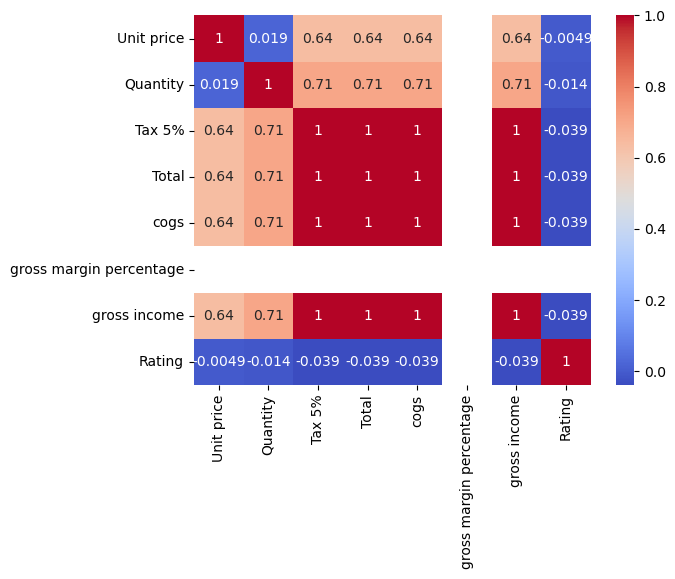

In [23]:
sales_corr = sales.corr()
sns.heatmap(sales_corr,annot=True,cmap='coolwarm')

In [24]:
correlation = sales['Quantity'].corr(sales['Tax 5%'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.706478728589643


We see that our dataframe was perfectly preserved through the pickling process.

### Row compression
- reducing the number of rows and thus compressing he number of data points
- numeric variables are easier to aggregate (mean, mode)


In [25]:
X = sales[['Quantity', 'Tax 5%']]
y = sales['Total']
X = pd.get_dummies(X, drop_first=True)


### One- hot encoding
- converting text-based values in columns into numeric values (binary form)
- we need to do this for linear regression, e.g. because simply some algorithms require numerical data 
- 0 represents False, 1 represent True
- numerical values in our datasets should not contain commas or fullstops


In [26]:
# Convert non-numeric data using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

### Train/Test split
- in ML, input data is split into train and test
- the first split is the training data, which is the initial reserve of data used to develop th the model (e.g. when building an email spam detector, then from the training data, false positives can be detected and also e.g.email notifications can be excluded)
- when a model is developed based on patterns extracted from the training dana and we are satisfied with the performance of the model and the accuracy of its prediction, we can test the model on the remaining data (the test data)
- if we are satisfied with the model’s performance on the test data, than the model is ready set go
- the ratio is usually 80/20, unless if we have a large dataset then 90/10 is good
- before we split the data, we need to randomize the order (shuffling) to avoid potential bias in th data (ordered by date or alphabetically)
- random_state = can be any int value, ensures reproducibility of results on many runs (if you keep the number the same, but can be any). It will



In [27]:
# Split data into test/train set (80/20 split) and shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


In [28]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [29]:
print(X)

    Quantity   Tax 5%
1          5   4.0110
2          7  16.2155
3          8  23.2880
4          7  30.2085
5          7  29.8865
..       ...      ...
9          2   5.8030
10        10   8.7450
11         1   3.0475
12         1   2.0175
13        10  48.6900

[1008 rows x 2 columns]


In [30]:
y_pred = model.predict(X_test)
print(y_pred)

[ 479.6442881   175.87284712  145.37445009   53.9888671   484.97451637
  277.63776622  146.59896186  160.18023083   96.10585205  652.27339122
   57.02758015  441.67907489   22.32969765  833.61795392  326.39589015
   84.92349836   72.37533666  334.45386787   92.98792361  217.9979381
   49.72324778  209.08370401  217.61181213   69.36738927   46.63608498
   16.05036652  407.29215599  224.42427698  133.89089734  807.68158624
  856.47360635  586.64493048   78.40191848  399.74796938  887.94376584
  189.07941316  122.4250287   247.86151288  709.3293471   588.35080922
  132.71557134  125.65919925  404.33505286  165.88774302  208.63457472
  272.5531037   523.35882924   92.672907    708.32368846   85.48739772
  874.15009127  360.9088157    77.88573285  867.11472028  228.08565322
  116.12156593   55.83051702  722.24097516  279.14984595  737.77534712
  331.1204033   145.0222203   107.10232631   88.32733626  408.40042565
  634.00242775  290.42431011  120.61414443   33.43928348   97.99668774
  321.1

### Evaluation for Linear Regression


1) MAE measures the average of the errors in a set of predictions, i.e. how far the regression line is to the actual data points.The MAE measures the average absolute difference between the predicted and actual values in a regression problem.

2) R-squared Score: The R-squared score, also known as the coefficient of determination, represents the proportion of the variance in the target variable that can be explained by the regression model. The R-squared value ranges from 0 to 1, of 1 indicates that the model perfectly explains the variance in the target variable.

In [31]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)
print('R-squared Score:', r2)


Mean Absolute Error: 0.028848927235054857
R-squared Score: 0.9999999823027641


In [32]:
invoice = [
   7, #quantity
   17.0110, #tax
]

# Make prediction
invoice = model.predict([invoice])
invoice

C:\Users\User\anaconda4\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([357.21667381])

### Logistic regression (classification task)

- since it is classification, the dependent variable is  a discrete categorical one (e.g. if we want to predict a new customer vs returning one)
- this algorithm is often used to predict between two discrete classes, e.g. pregnant and not pregnant
- used in fraud detection, disease diagnosis, emergency detection, loan detection, identification of spam email etc.



To predict the type of payment used (the dependent variable),we might consider the Total amount of the invoice and the quantity of items purchased (the independent variables).

In [33]:
X = sales[['Total', 'Quantity']]
y = sales['Payment']

- after the split we can design the model and apply it to the training data
- the 20 or 30 percent we left for testing is the part that we’re not allowed to train on, otherwise our model will incorrectly be really accurate
- there are a range of metrics for evaluation and choosing the right one depends on the application of the model


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


In [35]:
# Assign algorithm
model = LogisticRegression(max_iter=10000)

# Link algorithm to X and y variables
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [36]:
# Run algorithm on test data to make predictions
y_pred = model.predict(X_test)

### Evaluation for Logistic Regression


1) Accuracy: Accuracy measures the overall correctness of the model's predictions by calculating the ratio of correctly classified samples to the total number of samples. It provides a general measure of the model's performance but may not be suitable for imbalanced datasets.


2) Precision: Precision measures the proportion of true positive predictions (correctly predicted positive instances) out of all positive predictions made by the model. It focuses on the accuracy of positive predictions and is useful when the cost of false positives is high.

3) Recall (Sensitivity/True Positive Rate): Recall calculates the proportion of true positive predictions out of all actual positive instances in the dataset. It is a measure of the model's ability to correctly identify positive instances and is useful when the cost of false negatives is high.

4) F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balanced evaluation of the model's performance, taking into account both precision and recall. F1-score is a commonly used metric when the dataset is imbalanced or when you want to strike a balance between precision and recall.

In [37]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy:', accuracy)
print('F1-score:', f1)


Accuracy: 0.3415841584158416
F1-score: 0.17394322458076064


In [38]:
# Make prediction
invoice = [
  357.21667381, #total
  7, #quantity

]

# Make prediction
invoice = model.predict([invoice])
invoice

C:\Users\User\anaconda4\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Ewallet'], dtype=object)